# 1. Setup and Load Data

## 1.1 Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

### 1.1.a) If you have problems, update the pip

In [ ]:
!python.exe -m pip install --upgrade pip

### 1.1.b) See if the dependency has been installed ( Tensorflow-gpu and matplotlib )

In [ ]:
!conda list

### 1.1.c) Imports and configurations

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 1.2 Remove dodgy images

In [4]:
import cv2 # DACA TREBUIE INSTALAT https://anaconda.org/conda-forge/opencv
import imghdr
from matplotlib import pyplot as plt

In [5]:
img = cv2.imread(os.path.join('data/images/train','Amber','amber_30.jpg'))

In [6]:
img.shape

(300, 300, 3)

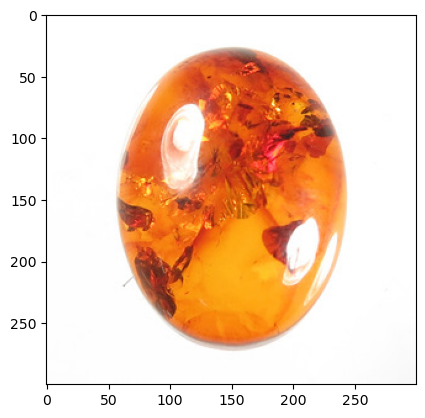

In [7]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #
plt.show()

Incepem sa facem dataset din pozele noastre

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [125]:
data = tf.keras.utils.image_dataset_from_directory('data/images/train')

Found 2856 files belonging to 87 classes.


In [11]:
data

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [126]:
data_iterator = data.as_numpy_iterator()

In [127]:
data_iterator

In [128]:
batch = data_iterator.next()

In [ ]:
batch[1]

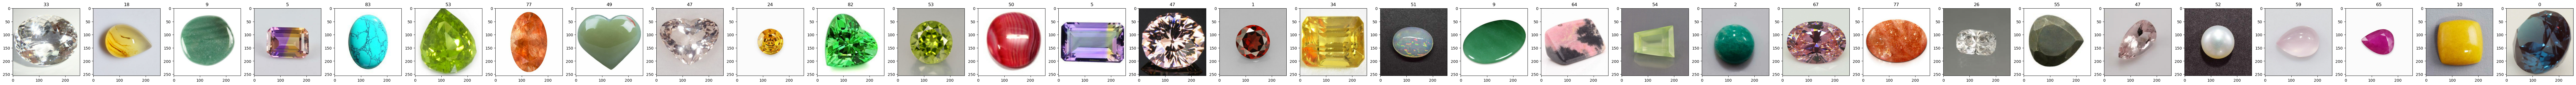

In [29]:
fig, ax = plt.subplots(ncols=32, figsize=(120,20))
for idx, img in enumerate(batch[0][:32]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

SCALAM ACUM

In [129]:
data = data.map(lambda x,y: (x/255, y))

In [130]:
scaled_iterator = data.as_numpy_iterator()

In [131]:
scaled_batch = scaled_iterator.next()

In [ ]:
scaled_batch[0]

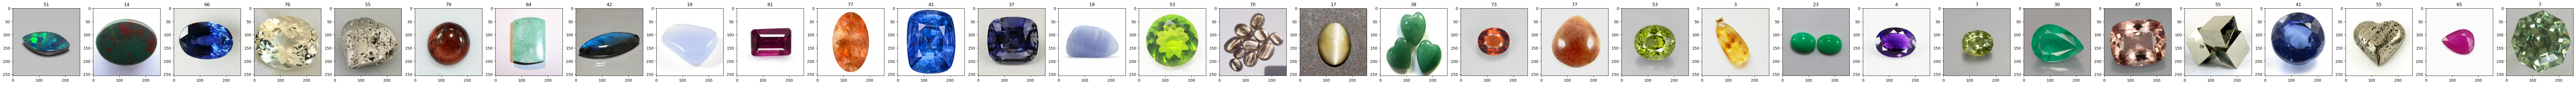

In [39]:
fig, ax = plt.subplots(ncols=32, figsize=(120,20))
for idx, img in enumerate(scaled_batch[0][:32]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(scaled_batch[1][idx])

Acum vrem sa verificam daca min si max s-au normalizat, adica e intre 0 si 1... nu 0 si 255

In [ ]:
print(scaled_batch[0].min())
print(scaled_batch[0].max())

print(scaled_batch[0])

Acum vrem sa avem variabilele train , val, test si sa creem variabile ce vor contine batch-urile pentru fiecare

In [133]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.3)+1

In [134]:
print(len(data))
print(train_size)
print(val_size)

90
62
28


In [135]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

test_data = tf.keras.utils.image_dataset_from_directory('data/images/test')
test_size = int(len(test_data))
test = test_data.take(test_size)

Found 363 files belonging to 87 classes.


In [57]:
print(len(train))
print(len(val))
print(len(test))

62
28
12


### Incepem sa facem partea de A.I !!!!

In [212]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD

In [213]:
model = Sequential()

In [1]:
MaxPooling2D??

Object `MaxPooling2D` not found.


In [214]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D())


#model.add(Conv2D(16, (3,3), 1, activation='relu'))
#model.add(Dropout(0.5))
#model.add(MaxPooling2D())



model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(87, activation='softmax'))

In [215]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adamax', metrics=['accuracy'])

In [236]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 125, 125, 16)      2320      
_________________________________________________________________
dropout_18 (Dropout)         (None, 125, 125, 16)      0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 62, 62, 16)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 61504)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)             

## TRAIN

In [140]:
logdir='logs'

In [141]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [216]:
validation_split = 0.2
verbosity = 1
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback],verbose=verbosity)

Epoch 1/25
62/62 [==============================] - 5s 71ms/step - loss: 4.3648 - accuracy: 0.0670 - val_loss: 3.9009 - val_accuracy: 0.1147
Epoch 2/25
62/62 [==============================] - 4s 60ms/step - loss: 3.2385 - accuracy: 0.2359 - val_loss: 3.0766 - val_accuracy: 0.2420
Epoch 3/25
62/62 [==============================] - 4s 59ms/step - loss: 2.2234 - accuracy: 0.4516 - val_loss: 2.4459 - val_accuracy: 0.3509
Epoch 4/25
62/62 [==============================] - 4s 61ms/step - loss: 1.5372 - accuracy: 0.6205 - val_loss: 2.0672 - val_accuracy: 0.4553
Epoch 5/25
62/62 [==============================] - 4s 62ms/step - loss: 1.1253 - accuracy: 0.7193 - val_loss: 1.9737 - val_accuracy: 0.4839
Epoch 6/25
62/62 [==============================] - 4s 63ms/step - loss: 0.7641 - accuracy: 0.8306 - val_loss: 1.7714 - val_accuracy: 0.5287
Epoch 7/25
62/62 [==============================] - 4s 60ms/step - loss: 0.5554 - accuracy: 0.8841 - val_loss: 1.7899 - val_accuracy: 0.5287
Epoch 8/25
62

In [ ]:
hist.history

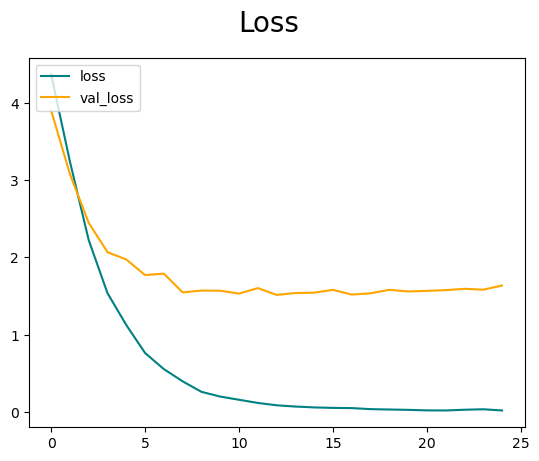

In [217]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

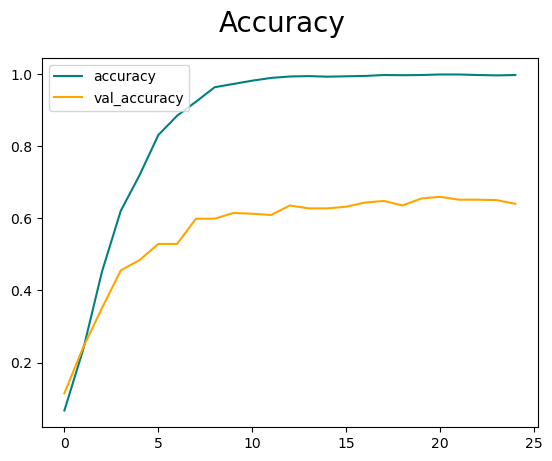

In [218]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Testam Acuratetea

In [95]:
from tensorflow.keras.models import load_model

In [96]:
model.save(os.path.join('models','imageclassifier.h5'))

In [275]:
new_model = load_model('models/imageclassifier.h5')

In [223]:
score = model.evaluate(test, verbose=0)
print(f'Test accuracy: {score[1]}')

Test accuracy: 0.42699724435806274
